In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from lenet import Net
from utils import to_numpy_array, fgsm_attack

c:\Users\malay\miniconda3\envs\cs776\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
batch_size = 16
epsilons = [0, .05, .1, .15, .2, .25, .3]
# epsilons = [0]

cuda


In [3]:
transform=transforms.Compose([
            transforms.ToTensor(),
])

test_dataset = torchvision.datasets.MNIST(root= './data', train = False, download =True, transform = transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [4]:
dataset = 'mnist'

In [5]:
model = Net()
model.to(device)
model.load_state_dict(torch.load('./models/lenet_mnist_model.pth'))
accs = []

In [13]:
for eps in epsilons:
    total = 0
    correct = 0

    for i, (imgs, labels) in enumerate(test_loader):
        imgs = imgs.to(device)
        labels = labels.to(device)
        # print(labels.shape)
        imgs = Variable(imgs, requires_grad=True)
        labels = Variable(labels)

        new_imgs, new_preds = fgsm_attack(model, imgs, labels, eps, dataset)
        correct += (new_preds==labels).sum().item()
        total += labels.size(0)

    accs.append((correct / total))
    print("Epsilon: {}, Test Accuracy: {}".format(eps, correct / total))

Epsilon: 0, Test Accuracy: 0.9468
Epsilon: 0.05, Test Accuracy: 0.8959
Epsilon: 0.1, Test Accuracy: 0.823
Epsilon: 0.15, Test Accuracy: 0.6991
Epsilon: 0.2, Test Accuracy: 0.5375
Epsilon: 0.25, Test Accuracy: 0.3705
Epsilon: 0.3, Test Accuracy: 0.2383


In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)  # create figure & 1 axis
ax.plot(epsilons, accs, "*-")
ax.set_title("Accuracy vs Epsilon")
ax.set_xlabel("Epsilon")
ax.set_ylabel("Accuracy")
fig.savefig('./plots/epsilon_vs_accuracy_mnist.png', transparent=False)   # save the figure to file
plt.close(fig)    # close the figure window

c:\Users\malay\miniconda3\envs\cs776\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


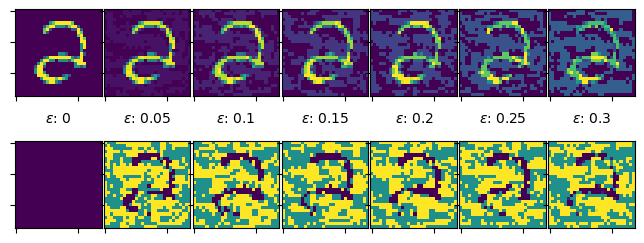

In [48]:
for i, (imgs, labels) in enumerate(test_loader):
    imgs, labels = imgs.to(device), labels.to(device)
    imgs, labels = Variable(imgs, requires_grad=True), Variable(labels)

    plot_name = f'./plots/fgsm_attack_{dataset}.png'

    f = plt.figure(figsize=(8,4))
    gs = f.add_gridspec(2, len(epsilons))
    gs.update(wspace=0.025, hspace=-0.25) 

    for i in range(len(epsilons)):
        eps = epsilons[i]
        ax1 = f.add_subplot(gs[0,i])
        imgs, labels = imgs.to(device), labels.to(device)
        imgs, labels = Variable(imgs, requires_grad=True), Variable(labels)

        adv_imgs, _ = fgsm_attack(model, imgs, labels, eps, dataset)

        img, adv_img = imgs[0], adv_imgs[0]
        img, adv_img = to_numpy_array(img), to_numpy_array(adv_img)

        ax1.imshow(adv_img)
        ax1.set_xlabel(f"$\epsilon$: {eps}")
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    for i in range(len(epsilons)):
        eps = epsilons[i]
        ax2 = f.add_subplot(gs[1, i])
        imgs, labels = imgs.to(device), labels.to(device)
        imgs, labels = Variable(imgs, requires_grad=True), Variable(labels)

        adv_imgs, _ = fgsm_attack(model, imgs, labels, eps, dataset)

        img, adv_img = imgs[0], adv_imgs[0]
        img, adv_img = to_numpy_array(img), to_numpy_array(adv_img)
        noise = adv_img - img

        ax2.imshow(noise)
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])

    f.show()
    f.savefig(plot_name, transparent=False, dpi=300)
    break

In [47]:
# for eps in epsilons:

#     for i, (imgs, labels) in enumerate(test_loader):
#         imgs, labels = imgs.to(device), labels.to(device)
#         imgs, labels = Variable(imgs, requires_grad=True), Variable(labels)

#         adv_imgs, _ = fgsm_attack(model, imgs, labels, eps, dataset)

#         img, adv_img = imgs[0], adv_imgs[0]
#         img, adv_img = to_numpy_array(img), to_numpy_array(adv_img)
#         noise = adv_img - img
        
        
#         plot_name = f"./plots/fgsm_attack_epsilon_{eps}.png"
#         f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
#         ax1.imshow(img)
#         ax1.set_title("Original Image")
#         ax2.imshow(adv_img)
#         ax2.set_title("Adversarial Image")
#         ax3.imshow(noise)
#         ax3.set_title("Noise")
#         f.savefig(plot_name, transparent=False, dpi=300)
#         break